In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

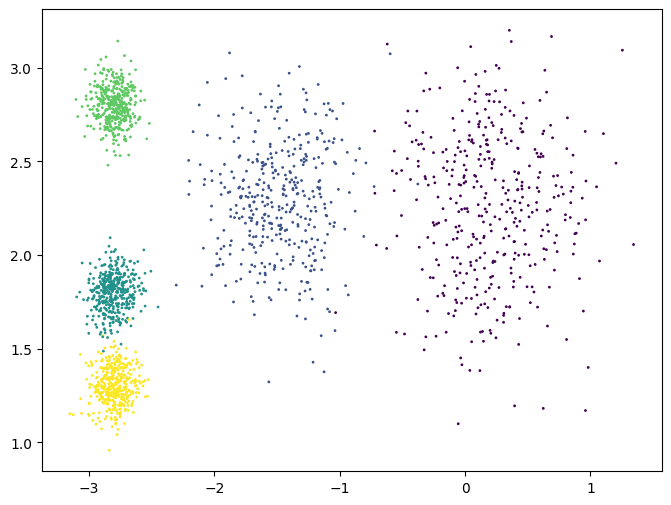

In [157]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X,y = make_blobs(n_samples=2000, centers=blob_centers,cluster_std=blob_std, random_state=7)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1],c=y,s=1)
plt.show()

In [158]:
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(X)
y_pred = kmeans.predict(X)
centroids = kmeans.cluster_centers_

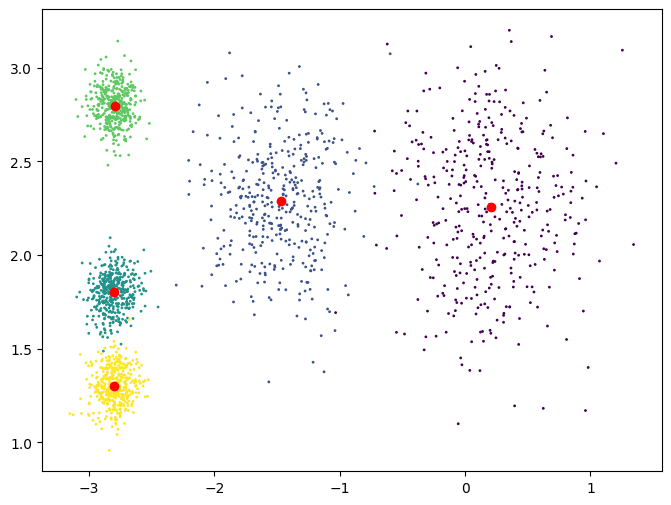

In [159]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c=y, s=1)
plt.scatter(centroids[:,0], centroids[:,1], c="red")
plt.show()

In [172]:
kmeans_per_k = [KMeans(n_clusters=n).fit(X) for n in range(1,10)]
inertia_list = [kmean.inertia_ for kmean in kmeans_per_k]

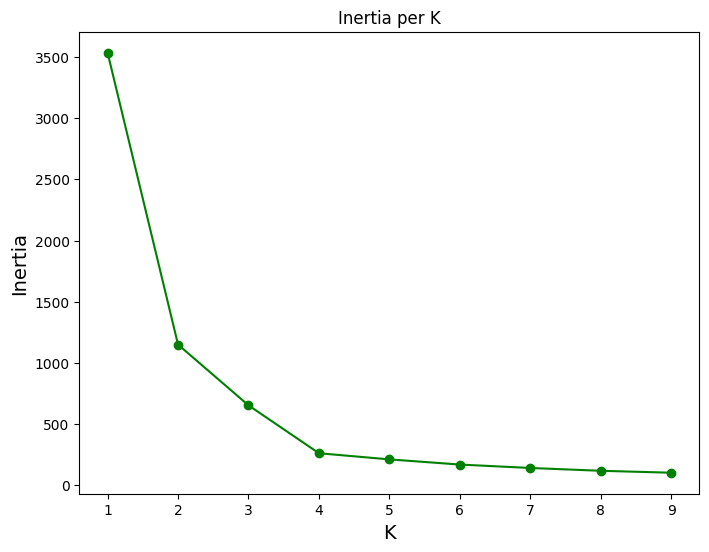

In [173]:
plt.figure(figsize=(8,6))
plt.title("Inertia per K")
plt.plot(range(1,10),inertia_list, "go-")
plt.xlabel("K",fontsize=14)
plt.ylabel("Inertia",fontsize=14)

plt.show()

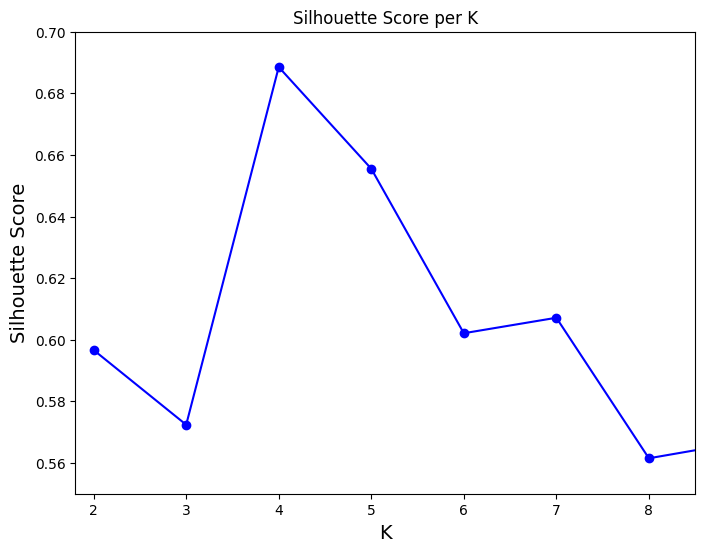

In [174]:
silhouette_scores = [silhouette_score(X, kmean.labels_) for kmean in kmeans_per_k[1:]]

plt.figure(figsize=(8,6))
plt.title("Silhouette Score per K")
plt.plot(range(2,10),silhouette_scores, "bo-")
plt.xlabel("K", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()